In [1]:
import sys
!{sys.executable} -m pip install folium

  Using cached https://files.pythonhosted.org/packages/a4/f0/44e69d50519880287cc41e7c8a6acc58daa9a9acf5f6afc52bcc70f69a6d/folium-0.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/13/fb/9eacc24ba3216510c6b59a4ea1cd53d87f25ba76237d7f4393abeaf4c94e/branca-0.4.1-py3-none-any.whl


In [2]:
import sys
!{sys.executable} -m pip install plotly.express

  Using cached https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/27/99/9794bcd22fae2e12b689759d53fe26939a4d11b8b44b0b7056e035c64529/plotly-4.8.2-py2.py3-none-any.whl


In [41]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py

In [42]:
virus = pd.read_csv('enteric_virus.csv')
virus.loc[:,'Alphapapillomavirus':'Unclassified virus']

,Alphapapillomavirus,Alphapolyomavirus,Alphatorquevirus,Betapapillomavirus,Betapolyomavirus,Betatorquevirus,Bocaparvovirus,Cardiovirus,Circovirus,Cosavirus,...,Norovirus,Parechovirus,Picobirnavirus,Porprismacovirus,Protoparvovirus,Rotavirus,Rubulavirus,Salivirus,Sapovirus,Unclassified virus
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,1,2,2,2,...,1,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2
703,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,2,2,2,2,1,2
704,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,2,2,2,2,1,2
705,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2


In [19]:
map = folium.Map(location=[10.47068691,105.6360626], zoom_start=0.001,tiles='Stamen Toner')

for lat, lon,CentrallyCity, ProvincialCity in zip(virus['LATITUDE'], virus['LONGITUDE'],virus['CentrallyCity'],virus['ProvincialCity']):
    folium.CircleMarker([lat, lon],
                        color='red',
                 
                 popup =('CentrallyCity: ' + str(CentrallyCity) + '<br>'
                        'ProvincialCity : ' + str(ProvincialCity) + '<br>'),

                        fill_color='red',
                        fill_opacity=0.1 ).add_to(map)
map

In [20]:
fig = px.pie( values=virus.groupby(['ProvincialCity']).size().values,names=virus.groupby(['ProvincialCity']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)


In [43]:
Common_Viruses = ['Rotavirus', 'Norovirus', 'Sapovirus', 'Kobuvirus','Mastadenovirus','Mamastrovirus']

virus_common = virus.copy()

for i in virus_common.loc[:,'Alphapapillomavirus':'Unclassified virus']:
    if i not in Common_Viruses:
        virus_common = virus_common.drop([i],axis=1)

        
virus_common = virus_common [~( virus_common [ Common_Viruses] == 2).all(axis=1) ]

In [33]:

Uncommon_viruses=['Alphapapillomavirus',
         'Alphapolyomavirus', 'Alphatorquevirus', 'Betapapillomavirus', 'Betapolyomavirus', 'Betatorquevirus', 'Bocaparvovirus',
         'Cardiovirus', 'Circovirus', 'Cosavirus', 'Cytomegalovirus', 'Enterovirus', 'Gammatorquevirus', 'Gemycircularvirus',
         'Gemykibivirus', 'Gemykrogvirus', 'Husavirus', 'Lymphocryptovirus', 'Morbillivirus', 'Parechovirus', 'Picobirnavirus',
         'Porprismacovirus', 'Protoparvovirus', 'Rubulavirus', 'Salivirus', 'Unclassified virus']



virus_common = virus.copy()

for i in virus_common.loc[:,'Alphapapillomavirus':'Unclassified virus']:
    if i not in Uncommon_viruses:
        virus_common = virus_common.drop([i],axis=1)

        
virus_common = virus_common [~( virus_common [ Uncommon_viruses] == 2).all(axis=1) ]

In [34]:
fig = px.pie( values=virus_common.groupby(['CentrallyCity']).size().values,names=virus_common.groupby(['CentrallyCity']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)


In [36]:
fig = px.pie( values=virus_common.groupby(['ProvincialCity']).size().values,names=virus_common.groupby(['ProvincialCity']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)


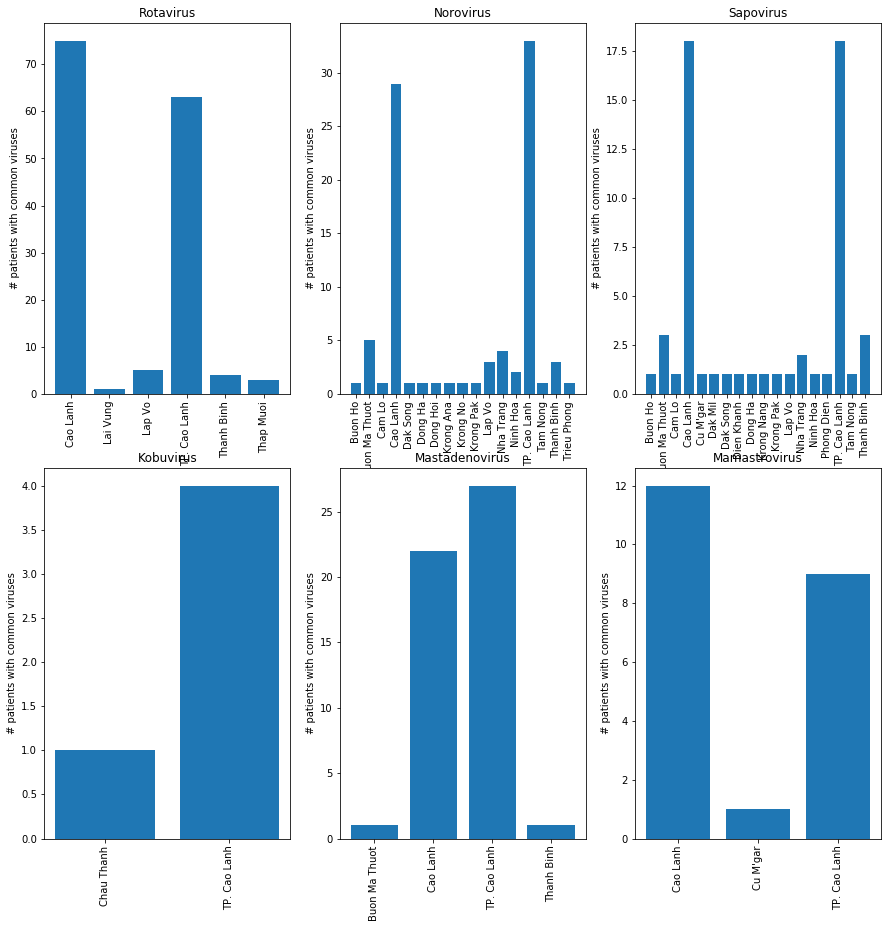

{'Cao Lanh': 12, "Cu M'gar": 1, 'TP. Cao Lanh': 9}


In [46]:
import seaborn as sns
from matplotlib import pyplot

fig, axs = plt.subplots(2,3, figsize=(15,15))
for v ,se in zip(Common_Viruses,range(1,7)):
    re_query = '{} == "1"'.format(v)
    a = virus_common.groupby(['ProvincialCity', v]).count().query(re_query)
    a = a.reset_index(level=['ProvincialCity', v])

    dic={}
    for i ,j in zip(a['ProvincialCity'],a['Sample ID']):
        dic[i] = j

    names = list(dic.keys())
    values = list(dic.values())
    
    # Visualization

    plt.subplot(2, 3, se)
    plt.bar(range(len(dic)),values,tick_label=names)
    plt.xticks(rotation=90)
    plt.title(v)

    plt.ylabel('# patients with common viruses')

plt.show()


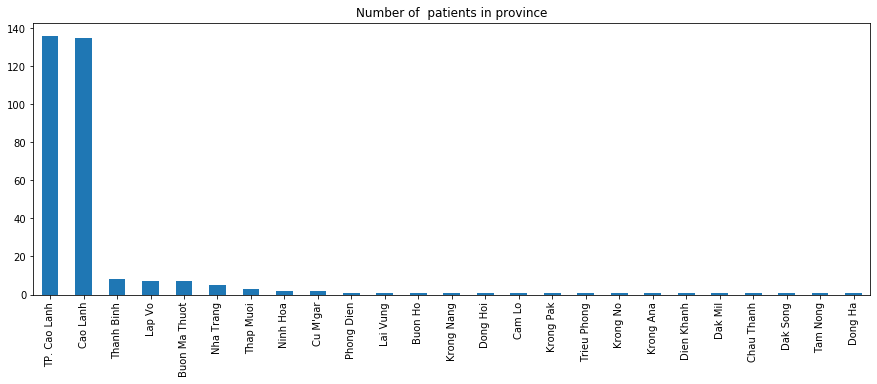

In [31]:
plt.figure(figsize=(15,5))
plt.title('Number of  patients in province')
virus_common.ProvincialCity.value_counts().plot.bar()

In [64]:
Common_Viruses = ['Rotavirus', 'Norovirus', 'Sapovirus', 'Kobuvirus','Mastadenovirus','Mamastrovirus']
Uncommon_Viruses =[]
virus_uncommon = virus.copy()

for i in virus_uncommon.loc[:,'Alphapapillomavirus':'Unclassified virus']:
    if i in Common_Viruses:
        Uncommon_Viruses = Uncommon_Viruses
        virus_uncommon = virus_uncommon.drop([i],axis=1)
    else:
        Uncommon_Viruses.append(i)
print(Uncommon_Viruses)
virus_uncommon = virus_uncommon [~( virus_uncommon [Uncommon_Viruses] == 2).all(axis=1) ]

['Alphapapillomavirus', 'Alphapolyomavirus', 'Alphatorquevirus', 'Betapapillomavirus', 'Betapolyomavirus', 'Betatorquevirus', 'Bocaparvovirus', 'Cardiovirus', 'Circovirus', 'Cosavirus', 'Cytomegalovirus', 'Enterovirus', 'Gammatorquevirus', 'Gemycircularvirus', 'Gemykibivirus', 'Gemykrogvirus', 'Husavirus', 'Lymphocryptovirus', 'Morbillivirus', 'Parechovirus', 'Picobirnavirus', 'Porprismacovirus', 'Protoparvovirus', 'Rubulavirus', 'Salivirus', 'Unclassified virus']


{'TP. Cao Lanh': 1}
{}
{'Cao Lanh': 32, 'Krong Nang': 1, 'Nha Trang': 1, 'Phong Dien': 1, 'TP. Cao Lanh': 36, 'Thanh Binh': 1}
{}
{'Cao Lanh': 3, 'TP. Cao Lanh': 2}
{'Cao Lanh': 28, 'Chau Thanh': 1, 'Krong Nang': 1, 'Nha Trang': 2, 'Phong Dien': 1, 'TP. Cao Lanh': 18, 'Thanh Binh': 1, 'Thap Muoi': 1}
{'Cao Lanh': 3, 'Lap Vo': 2, 'TP. Cao Lanh': 3, 'Thi Xa Hong Ngu': 1}
{'TP. Cao Lanh': 4}
{}
{'Cao Lanh': 3, 'Dak Mil': 1, 'TP. Cao Lanh': 1}
{'Cao Lanh': 2, 'TP. Cao Lanh': 1}
{'Buon Ma Thuot': 1, 'Cao Lanh': 24, 'Dien Khanh': 1, 'Dong Ha': 1, 'Dong Hoi': 1, 'Lap Vo': 1, 'Nha Trang': 1, 'Ninh Hoa': 1, 'TP. Cao Lanh': 19, 'Tam Nong': 1, 'Thanh Binh': 1}
{'Buon Ma Thuot': 1, 'Cao Lanh': 6, 'Nha Trang': 1, 'Phong Dien': 1, 'TP. Cao Lanh': 10}
{'TP. Cao Lanh': 1}
{'Cao Lanh': 1, 'TP. Cao Lanh': 1}


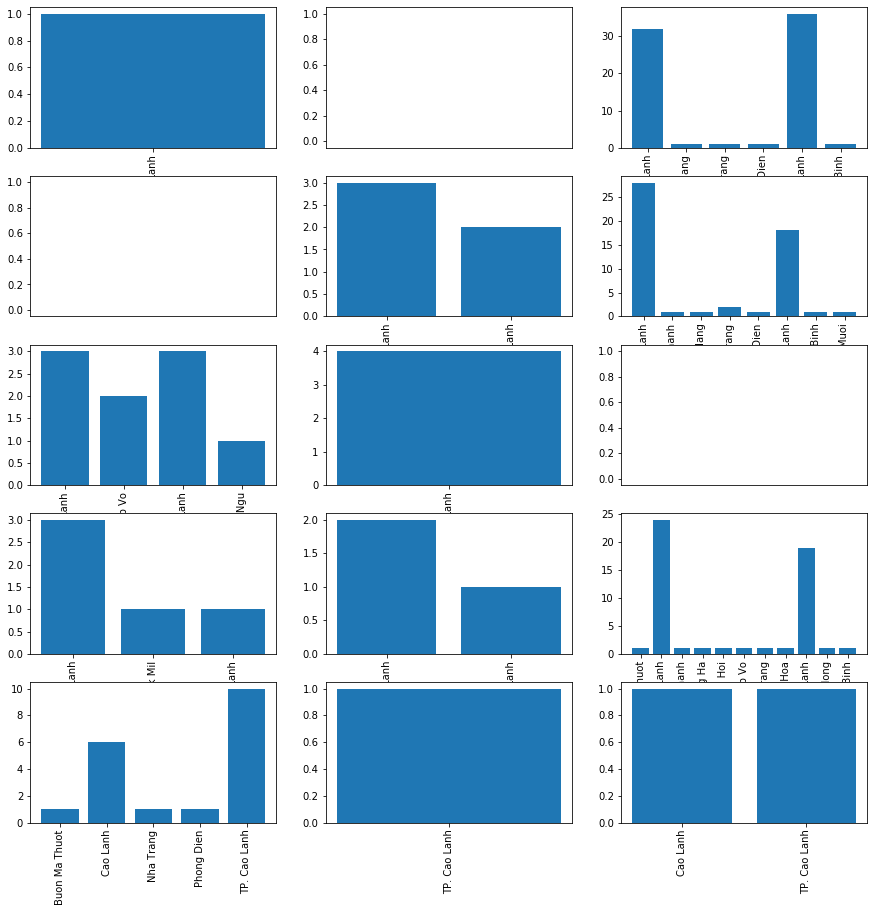

In [53]:
import seaborn as sns
from matplotlib import pyplot

fig, axs = plt.subplots(5,3, figsize=(15,15))
for i ,se in zip(Uncommon_Viruses,range(1,16)):
    re_query = '{} == "1"'.format(i)
    a = virus_uncommon.groupby(['ProvincialCity', i]).count().query(re_query)
    a = a.reset_index(level=['ProvincialCity', i])

    dic={}
    for i ,j in zip(a['ProvincialCity'],a['Sample ID']):
        dic[i] = j
    print(dic)
    names = list(dic.keys())
    values = list(dic.values())
    
    # Visualization

    plt.subplot(5, 3, se)
    plt.bar(range(len(dic)),values,tick_label=names)
    plt.xticks(rotation=90)

        
    
plt.show()

In [63]:
map = folium.Map(location=[10.47068691,105.6360626], zoom_start=0.001,tiles='Stamen Toner')

for lat1, lon1,CentrallyCity1, ProvincialCity1,lat2, lon2,CentrallyCity2, ProvincialCity2 in zip(virus_common['LATITUDE'], virus_common['LONGITUDE'],
                                                      virus_common['CentrallyCity'],virus_common['ProvincialCity'],
                                                     virus_uncommon['LATITUDE'], virus_uncommon['LONGITUDE'],
                                                     virus_uncommon['CentrallyCity'],virus_uncommon['ProvincialCity']):
    folium.CircleMarker([lat1, lon1],
                        color='red',
                 
                 popup =('CentrallyCity: ' + str(CentrallyCity1) + '<br>'
                        'ProvincialCity : ' + str(ProvincialCity1) + '<br>'),

                        fill_color='red',
                        fill_opacity=0.7 ).add_to(map)
    folium.CircleMarker([lat2, lon2],
                        color='green',
                 
                 popup =('CentrallyCity: ' + str(CentrallyCity2) + '<br>'
                        'ProvincialCity : ' + str(ProvincialCity2) + '<br>'),

                        fill_color='red',
                        fill_opacity=0.7 ).add_to(map)
    
map